In [1]:
from torchvision import models, transforms, datasets
import os
import torch.utils.data as utils
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from torchvision.utils import save_image
import torch.optim as optim
from collections import namedtuple
import matplotlib.pyplot as plt
import cv2

In [2]:
vgg = models.vgg16(pretrained=True)

In [3]:
vgg.classifier = nn.Sequential(nn.Linear(25088,4096),
                              nn.ReLU(True),
                              nn.Linear(4096, 256),
                              nn.ReLU(True),
                              nn.Linear(256,1),
                              nn.Sigmoid())

In [4]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [5]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)    
    return images

In [6]:
def load_data():
    images_synthetic = load_images_from_folder("./cvidea/classification_dataset/synthetic_images")
    images_real = load_images_from_folder("./cvidea/classification_dataset/real_images")
    
    images_real = [i.reshape(3,224,224) for i in images_real]
    images_synthetic = [i.reshape(3,224,224) for i in images_synthetic]
    
    images_real = [i/255.0 for i in images_real]
    images_synthetic = [i/255.0 for i in images_synthetic]
    
    images_real = np.array(images_real)
    images_synthetic = np.array(images_synthetic)
    
    tensor_real = [torch.Tensor(i) for i in images_real]
    tensor_synthetic = [torch.Tensor(i) for i in images_synthetic]
    
    label_real = [0 for i in range(len(images_real))]
    label_synthetic = [1 for i in range(len(images_synthetic))]
    
    tensor_real = zip(tensor_real, label_real)
    tensor_synthetic = zip(tensor_synthetic, label_synthetic)
    
    data = tensor_real+tensor_synthetic
    
    dataloader = utils.DataLoader(data, batch_size=8, shuffle=True)
    dataset_size = len(data)
    class_names = {0: "real_images",1: "synthetic_images"}
    num_classes = 2
    
    return dataloader, dataset_size, class_names, num_classes

In [7]:
dataloader, dataset_size, class_names, num_classes = load_data()

In [8]:
for i in dataloader:
    break

In [9]:
i[0][0].numpy().shape

(3, 224, 224)

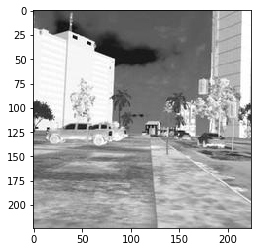

In [10]:
plt.imshow(i[0][0].numpy().reshape(224,224,3))

In [11]:
dataset_size

2665

In [12]:
criterion = nn.BCELoss()
optimizer = optim.SGD(vgg.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = vgg(inputs)
        
        labels=labels.type(torch.FloatTensor)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 10 == 0:
            print('[%d, %3d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 10.0))
            running_loss = 0.0
torch.save(vgg.state_dict(), './vgg_classifier.pth')

/home/greatskull/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


[1,   1] loss: 0.068
[1,  11] loss: 0.684
[1,  21] loss: 0.669
[1,  31] loss: 0.643
[1,  41] loss: 0.588
[1,  51] loss: 0.471
[1,  61] loss: 0.381
[1,  71] loss: 0.481
[1,  81] loss: 0.373
[1,  91] loss: 0.256
[1, 101] loss: 0.058
[1, 111] loss: 0.021
[1, 121] loss: 0.229
[1, 131] loss: 0.046
[1, 141] loss: 0.011
[1, 151] loss: 0.014
[1, 161] loss: 0.055
[1, 171] loss: 0.070
[1, 181] loss: 0.061
[1, 191] loss: 0.133
[1, 201] loss: 0.092
[1, 211] loss: 0.092
[1, 221] loss: 0.078
[1, 231] loss: 0.010
[1, 241] loss: 0.006
[1, 251] loss: 0.004
[1, 261] loss: 0.055
[1, 271] loss: 0.004
[1, 281] loss: 0.007
[1, 291] loss: 0.003
[1, 301] loss: 0.015
[1, 311] loss: 0.038
[1, 321] loss: 0.204
[1, 331] loss: 0.077


/home/greatskull/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


[2,   1] loss: 0.001
[2,  11] loss: 0.020
[2,  21] loss: 0.138
[2,  31] loss: 0.092
[2,  41] loss: 0.067
[2,  51] loss: 0.036
[2,  61] loss: 0.012
[2,  71] loss: 0.003
[2,  81] loss: 0.001
[2,  91] loss: 0.000
[2, 101] loss: 0.001
[2, 111] loss: 0.001
[2, 121] loss: 0.003
[2, 131] loss: 0.000
[2, 141] loss: 0.000
[2, 151] loss: 0.001
[2, 161] loss: 0.000
[2, 171] loss: 0.013
[2, 181] loss: 0.031
[2, 191] loss: 0.020
[2, 201] loss: 0.002
[2, 211] loss: 0.008
[2, 221] loss: 0.253
[2, 231] loss: 0.201
[2, 241] loss: 0.158
[2, 251] loss: 0.043
[2, 261] loss: 0.018
[2, 271] loss: 0.007
[2, 281] loss: 0.002
[2, 291] loss: 0.015
[2, 301] loss: 0.020
[2, 311] loss: 0.004
[2, 321] loss: 0.000
[2, 331] loss: 0.001


In [69]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        features = list(vgg.features)[:23]
        self.features = nn.ModuleList(features).eval() 
    
    def forward(self, x):
        results = []
        for ii,model in enumerate(self.features):
            x = model(x)
            if ii in {3,8,15,22}:
                results.append(x)
        vgg_outputs = namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])
        return vgg_outputs(*results)

In [70]:
feature_map_vgg = VGG16()

In [71]:
for data in dataloader:
    inp, label = data
    
    out = feature_map_vgg(inp)
    break

In [72]:
def plot_feature_map(layer):
    for i in range(3):
        for j in range(3):
            plt.imshow(out[layer][i][j].detach().numpy(),cmap='hot')
            plt.xlabel(class_names[int(label[i])], fontsize=10)
            plt.show()

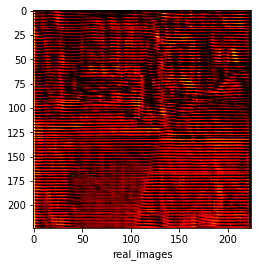

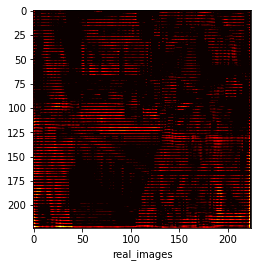

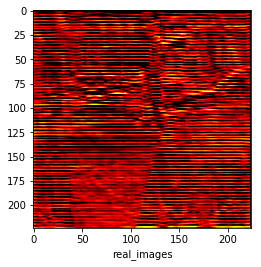

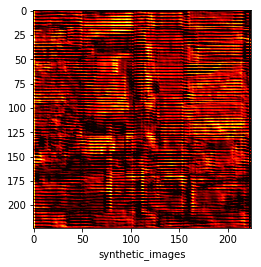

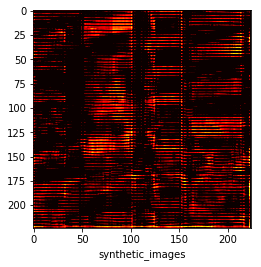

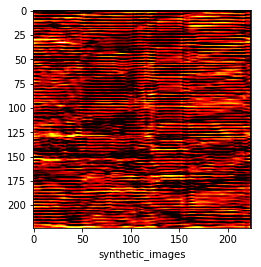

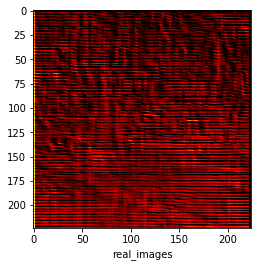

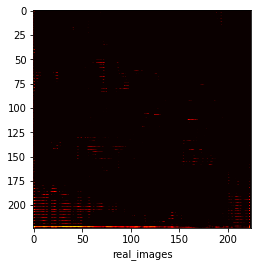

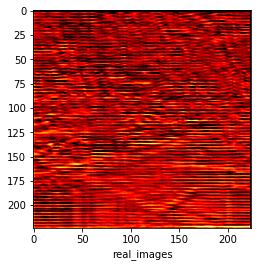

In [73]:
plot_feature_map(0)

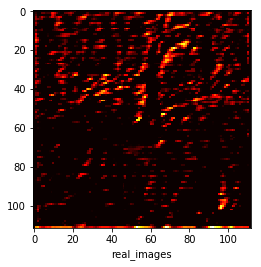

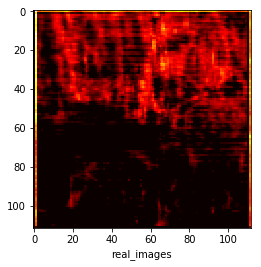

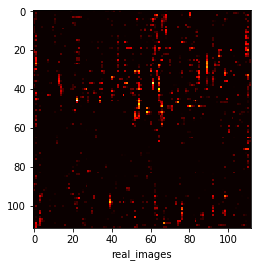

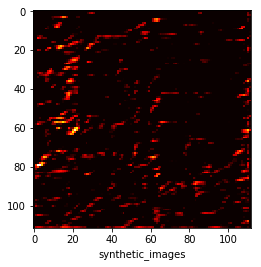

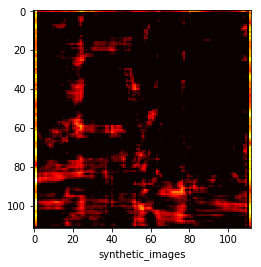

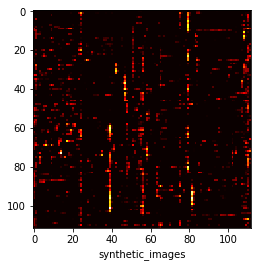

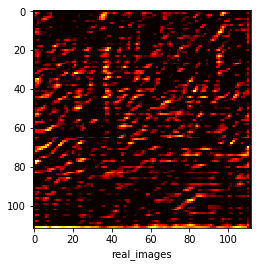

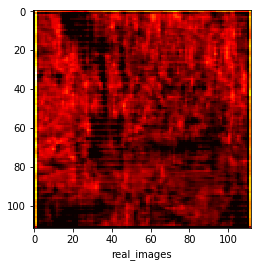

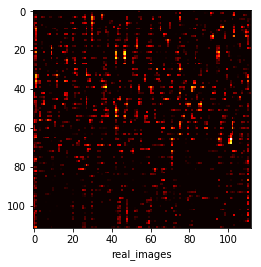

In [74]:
plot_feature_map(1)

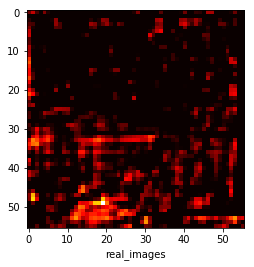

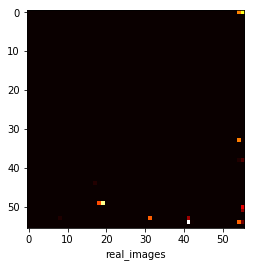

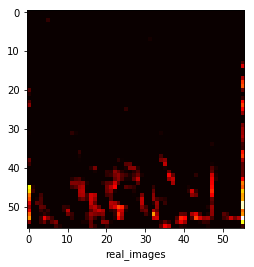

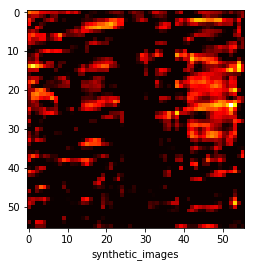

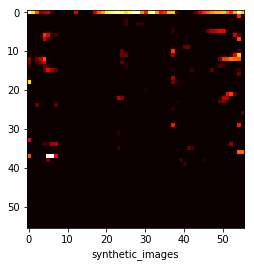

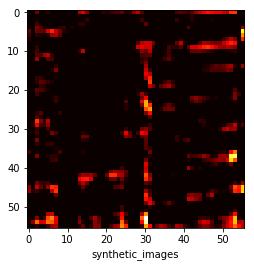

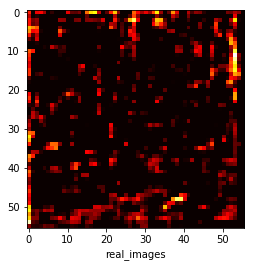

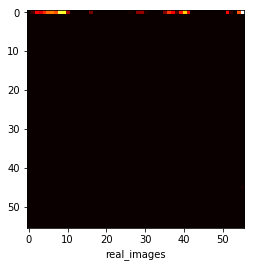

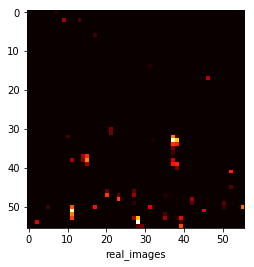

In [75]:
plot_feature_map(2)

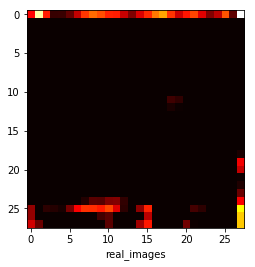

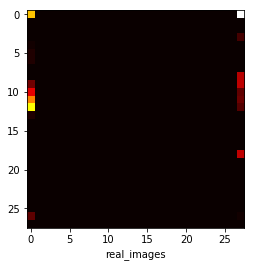

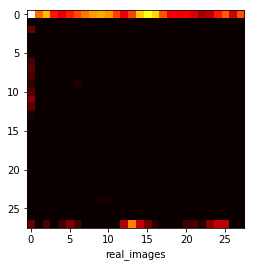

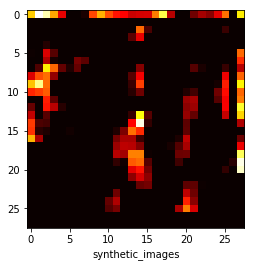

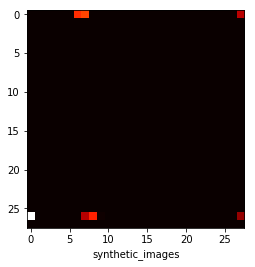

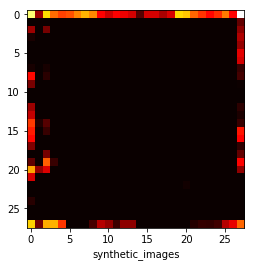

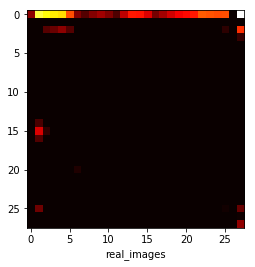

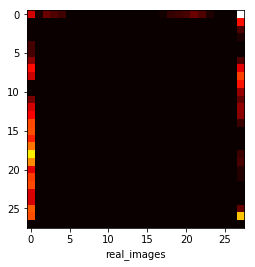

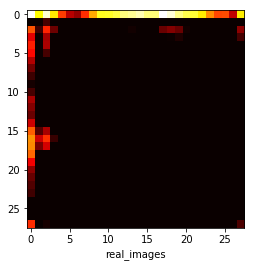

In [78]:
plot_feature_map(3)

In [79]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        features = list(vgg.features)[:23]
        self.features = nn.ModuleList(features).eval() 
    
    def forward(self, x):
        results = []
        for ii,model in enumerate(self.features):
            x = model(x)
            if ii in {2,7,14,21}:
                results.append(x)
        vgg_outputs = namedtuple("VggOutputs", ['conv1_2', 'conv2_2', 'conv3_3', 'conv4_3'])
        return vgg_outputs(*results)

In [80]:
feature_map_vgg = VGG16()

In [81]:
out = feature_map_vgg(inp)

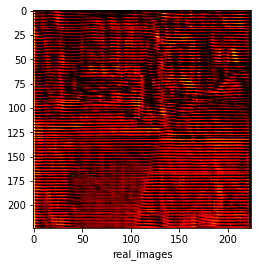

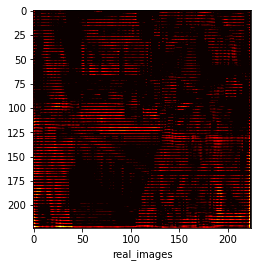

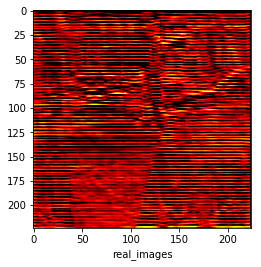

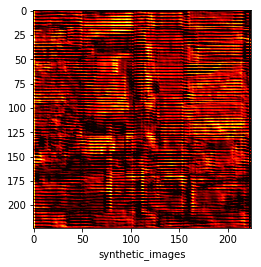

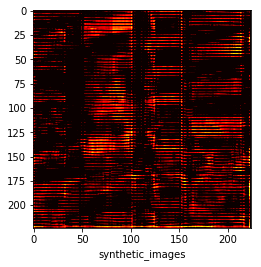

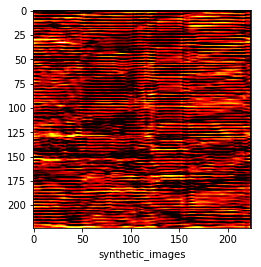

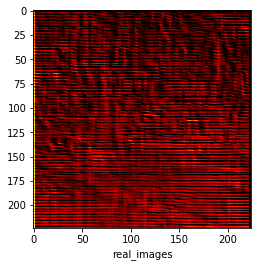

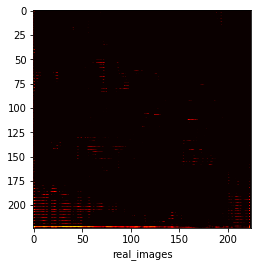

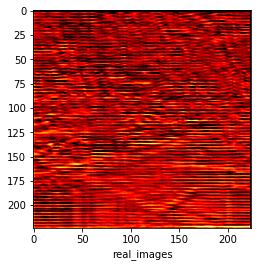

In [82]:
plot_feature_map(0)

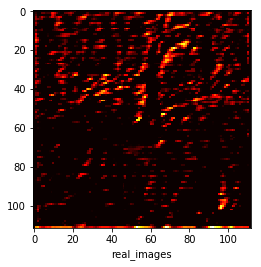

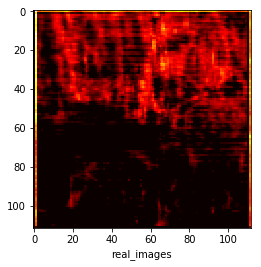

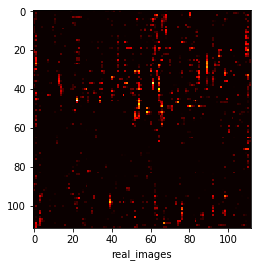

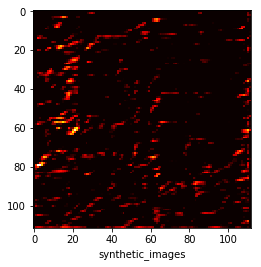

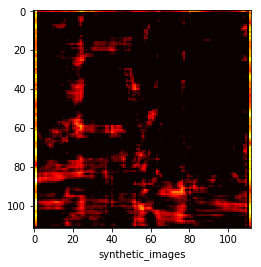

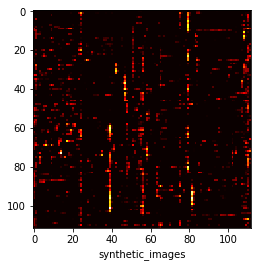

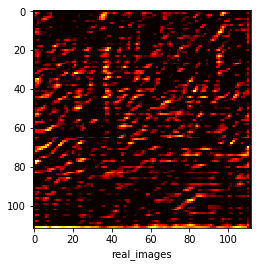

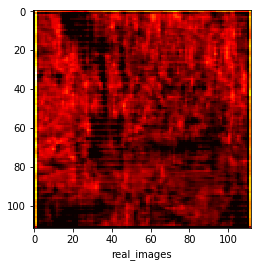

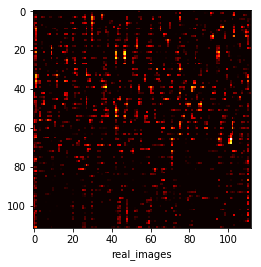

In [83]:
plot_feature_map(1)

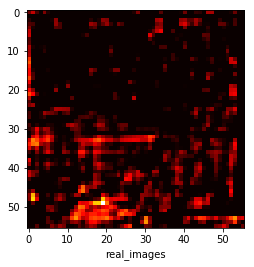

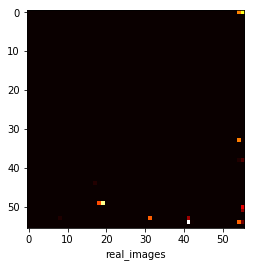

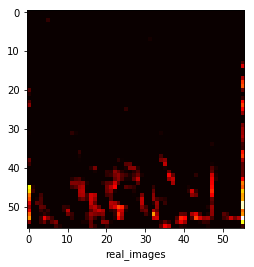

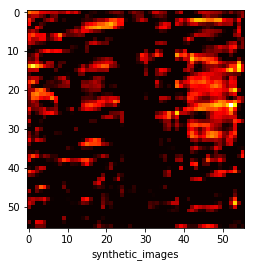

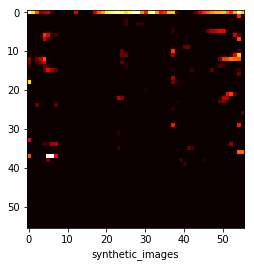

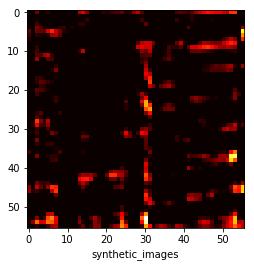

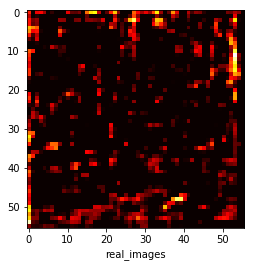

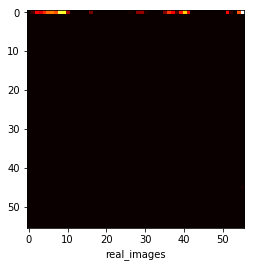

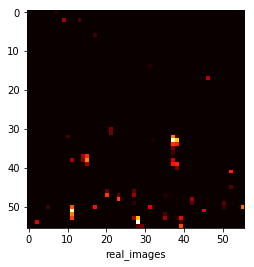

In [84]:
plot_feature_map(2)

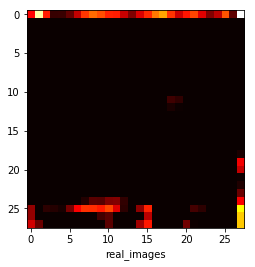

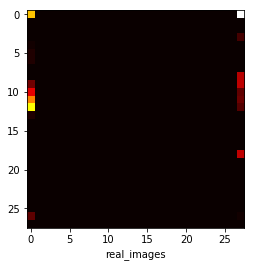

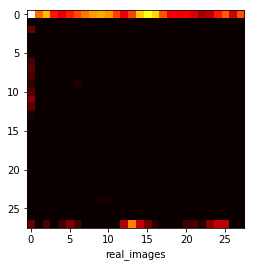

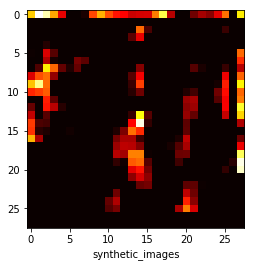

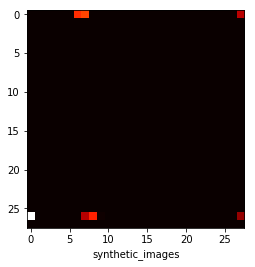

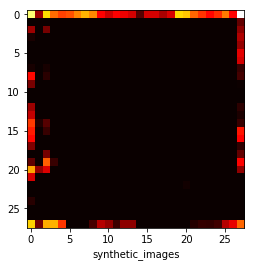

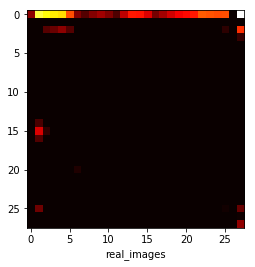

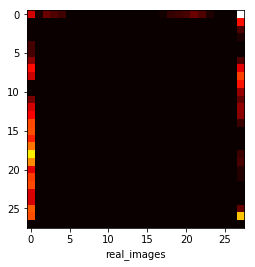

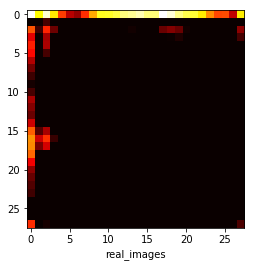

In [85]:
plot_feature_map(3)